# **Mengoptimalkan Harga Apartemen di Area Daegu - Korea Selatan, menggunakan Analisis Machine Learning**

**Daftar isi :**

1. Business Problem Understanding
2. Data Understanding
3. EDA (Exploratory Data Analysis)
4. Data Preparation
5. Modeling & Evaluation
6. Conclusion and Recommendations


![Cover](https://upload.wikimedia.org/wikipedia/commons/7/79/Daegu_from_Migliore.jpg)

# **1. Business Problem Understanding**

**Context**

Daegu adalah kota terbesar keempat di Korea Selatan dan wilayah metropolitan terbesar ketiga. Kota ini terletak di bagian tenggara negara tersebut, di wilayah Yeongnam.
Daegu adalah aglomerasi perkotaan terbesar ketiga di Korea Selatan setelah Seoul dan Busan; kota metropolitan terbesar keempat di negara ini dengan lebih dari 2,3 juta penduduk.
Daegu dan Provinsi Gyeongsang Utara di sekitarnya sering disebut sebagai Daegu-Gyeongbuk, dengan total populasi lebih dari 5 juta.

Tingkat hunian apartemen di Daegu cukup bervariasi, tetapi secara umum, apartemen di Daegu memiliki beberapa tingkat, seperti 10-15 lantai, dan beberapa apartemen bahkan bisa mencapai 30-50 lantai. Selain itu, apartemen di Daegu juga menawarkan berbagai tipe unit, mulai dari unit kecil hingga unit yang lebih besar atau mewah seperti penthouse. 

Dengan keterbatasan lahan untuk perumahan dan tingginya harga rumah di Daegu,maka apartement adalah salah satu alternatif hunian yang sangat menarik untuk dimiliki,hal ini karena dekat dengan pusat kota juga merupakan tempat tinggal yang nyaman.

**Problem Statement**

Problem utama terkait apartemen Daegu ini adalah terkait menentukan harga jual dari apartemen itu sendiri.penetapan harga jual yang tepat menjadi hal yang
sangat penting, karena harga yang terlalu tinggi dapat menghambat proses penjualan. Sementara harga yang terlalu rendah dapat mengurangi potensi keuntungan.
Ketepatan dalam menetapkan harga sangat penting untuk menjaga keseimbangan antara keuntungan dan daya tarik pasar.
Akan tetapi untuk menetapkan harga ini terdapat banyak faktor yang mempengaruhi seperti lokasi pembangunan apartemen,nilai tanah,dekat dengan fasilitas publik,
dengan dengan area yang populer seperti pusat perbelanjaan dan hiburan serta faktor - faktor lainnya.

**Goals**

Berdasarkan hal tersebut,maka sangat diperlukan pengembangan model prediktif yang dapat memperkirakan harga jual unit apartemen yang ada di Daegu sesuai dengan
karakteristiknya(luas tanah,jarak ke stasiin,dsb).
Model ini diharapkan dapat membantu para pemangku kepentingan dalam membuat keputusan yang tepat terkait harga, investasi, dan pengembangan properti.

**Analytic Approach**

Oleh sebab itu,hal yang perlu dilakukan adalah menganalis data untuk menemukan pola dari data yang tersedia.Karena target penelitian ini adalah **harga apartemen yang kontinu secara numerik**,maka pendekatan analisis yang akan digunakan adalah **Model Regresi**.
Model ini akan menggunakan data-data apartemen sebagai prediktor untuk memperkirakan harga jual.
Sehingga pada akhirnya akan membantu pemilik apartemen dalam memnbuat keputusan yang terbaik.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah **RMSE, MAE, dan MAPE, di mana RMSE** adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga apartemen yang sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

**Limitation**

- Model ini hanya dapat memprediksi harga apartemen di kota Daegu, dan tidak dapat digunakan sebagai tolok ukur harga di area lain.
- Model ini hanya menggunakan data pada satu waktu tertentu, tidak dapat meramalkan harga di masa mendatang, karena dapat terjadi perubahan tren di masa mendatang.
- Model ini hanya mempertimbangkan fitur-fitur dalam kumpulan data dan tidak dapat menangkap fenomena di luar fitur yang ada,terutama faktor sosial,budaya,dan
  pemerintahan.

# **2. Data Understanding**

- Dataset ini berisi data apartemen di kota Daegu yang di bangun dalam rentang waktu tahun 1978 s/d 2015
- Dataset ini merupakan data list Apartemen di kota Daegu (Korea Selatan) dan setiap barisnya terdiri dari karakteristik(harga jual, fasilitas, tahun dibuat, dsb.)

**Attributes Information**

| No. | Column | Description | Data Type |
|----|-------------------------|-----------------------------------------------------------------------------------------------------|-------------|
| 1 | HallwayType | The type of hallway in the property, indicating the interior design or layout. | Categorical |
| 2 | TimeToSubway | Time required to reach the nearest railway station. | Categorical |
| 3 | SubwayStation | Name of the nearest train station. | Categorical |
| 4 | N_FacilitiesNearBy(ETC) | Number of additional facilities near the property (e.g. parks, shopping centers). | Numerical |
| 5 | N_FacilitiesNearBy(PublicOffice) | Number of public office facilities around the property. | Numerical |
| 6 | N_SchoolNearBy(University) | Number of universities near the property. | Numerical |
| 7 | N_Parkinglot(Basement) | Number of parking spaces in the basement of the property. | Numerical |
| 8 | YearBuilt | Year of property construction. | Numerical |
| 9 | N_FacilitiesInApt | Number of facilities available in the apartment. | Numerical |
| 10 | Size(sqf) | Property size in square feet. | Numerical |
| 11 | SalePrice | Property sale price. | Numerical |

### **Import Library & Ignore Warning**

In [1]:
# import library explorasi data
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# menghilangkan warning
import warnings
warnings.filterwarnings('ignore')

### **Load Data dan tampilkan**

In [2]:
df = pd.read_csv('data_daegu_apartment.csv')
display(df.head(), df.tail())

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451
4122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,868,250442


Data diatas di tampilkan 5 teratas dan 5 terbawah. Pada data ini(contoh baris ke-0), dalam satu baris terdapat tipe/jenis apartemen terraced, kemudian dari unit ke stasiun bawah tanah menempuh waktu 0-5 menit. Nama stasiun yang dekat dengan unit ini adalah Kyungbuk_uni_hospital. Unit Apartemen berdekatan dengan 3 fasilitas publik dan  2 sekolah tinggi (universitas). apartemen ini juga memiliki tempat parkir bawah tanah yang dapat menampung 1270 kendaraan. Apartemen ini dibangun pada tahun 2007, apartement ini memiliki 10 fasilitas, dan luas unit sebesar 1387 sqft. Unit Apartemen ini dijual dengan harga 346.017 ribu won.

In [3]:
##Jumlah Baris dan Kolom 
print(f"Jumlah Baris dan Kolomnya adalah ==> {df.shape}")

Jumlah Baris dan Kolomnya adalah ==> (4123, 11)


In [4]:
## Lihat nama kolomnya 
df.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

In [5]:
#Informasi tipe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [6]:
#Mengecek Jumlah Nilai Kosong (NaN) dalam DataFrame
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [7]:
#Mengecek Jumlah Baris Duplikat dalam DataFrame
df.duplicated().sum()

1422

In [8]:
# Statistik deskriptif Data Numerik
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [9]:
# Statistik deskriptif Data Kategorikal
df.describe(include=["object"])

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


# **3. EDA (Exploratory Data Analysis)**

## **Data Distribution**

Untuk mendapatkan insight tentang karakteristik property yang ada di Daegu dalam hal ini ukuran,harga,tahun dibangun,jumlah fasilitas publik
dan aspek-aspek lainnya,maka perlu dipahami terkait distribusi datanya.

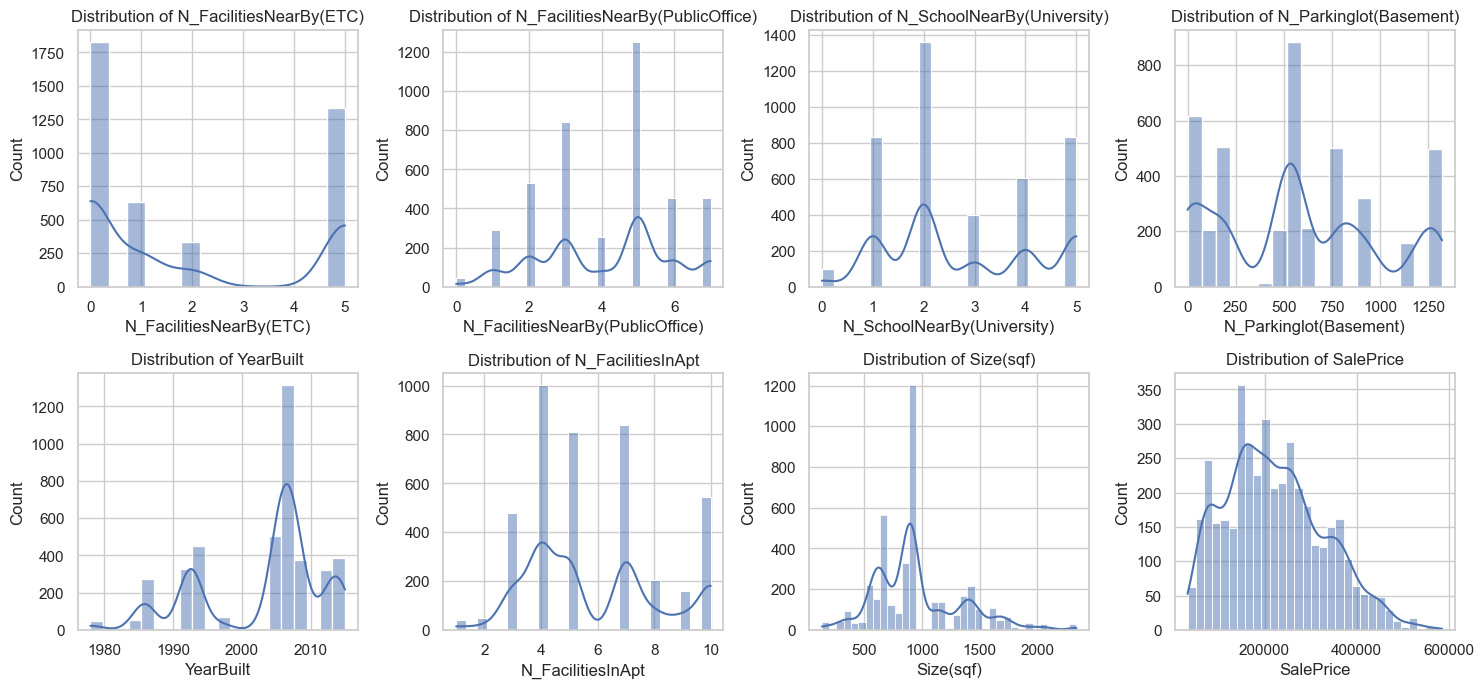

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df
# Kengatur tampiilan dari plot
sns.set(style="whitegrid")

# Membuat daftar kolom numerik untuk analisis distribusi
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Memplot distribusi kolom numerik
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

Berdasarkan visualisasi distribusi data di atas, berikut adalah beberapa gambaran umum yang dapat kita peroleh:

- **N_FacilitiesNearBy(ETC)**: Data ini menunjukkan bahwa mayoritas properti memiliki sedikit atau tidak ada fasilitas tambahan di sekitarnya, dengan sejumlah kecil properti memiliki hingga 5 fasilitas tambahan.
- **N_FacilitiesNearBy(PublicOffice)**: Distribusi menunjukkan variasi yang lebih luas dalam jumlah fasilitas kantor publik di sekitar properti, dengan puncak pada properti yang memiliki 2 dan 5 fasilitas di dekatnya.
- **N_SchoolNearBy(University)**: Sebagian besar properti terletak di dekat satu atau dua universitas, yang menunjukkan bahwa properti tersebut mungkin menarik bagi pasar sewa mahasiswa atau keluarga yang menghargai pendidikan tinggi yang mudah diakses.
- **N_Parkinglot(Basement)**: Distribusi ini sangat condong ke kanan, dengan sebagian besar properti memiliki jumlah tempat parkir yang relatif sedikit, tetapi beberapa properti menawarkan banyak tempat parkir.
- **YearBuilt**: Ada puncak dalam distribusi properti yang dibangun sekitar tahun 2000-an up, yang menunjukkan bahwa mungkin ada ledakan konstruksi atau pembangunan apartemen selama periode tersebut.
- **N_FacilitiesInApt**: Sebagian besar properti tampaknya memiliki jumlah fasilitas yang relatif sedikit di apartemen, dengan beberapa properti menawarkan lebih banyak.
- **Size(sqf)**: Ukuran properti cenderung mengelompok di sekitar nilai yang lebih rendah, dengan sebagian besar properti berukuran relatif sedang, dan hanya sedikit yang sangat besar.
- **SalePrice**: Harga penjualan menunjukkan distribusi yang miring ke kanan, yang menunjukkan bahwa sebagian besar properti berada dalam kisaran harga yang lebih rendah, dengan beberapa properti memiliki harga jual yang sangat tinggi. Ini juga menunjukkan adanya outlier potensial di ujung kanan distribusi yang mungkin memerlukan perhatian lebih lanjut.

Wawasan ini dapat digunakan untuk menentukan strategi penyesuaian harga, memahami berbagai segmen pasar, dan merancang strategi pemasaran yang tepat. Misalnya, agen real estat dapat menargetkan properti dengan fasilitas tertentu yang disukai pasar atau dapat merekomendasikan perbaikan untuk meningkatkan nilai jual kembali properti dengan fasilitas yang lebih sedikit.

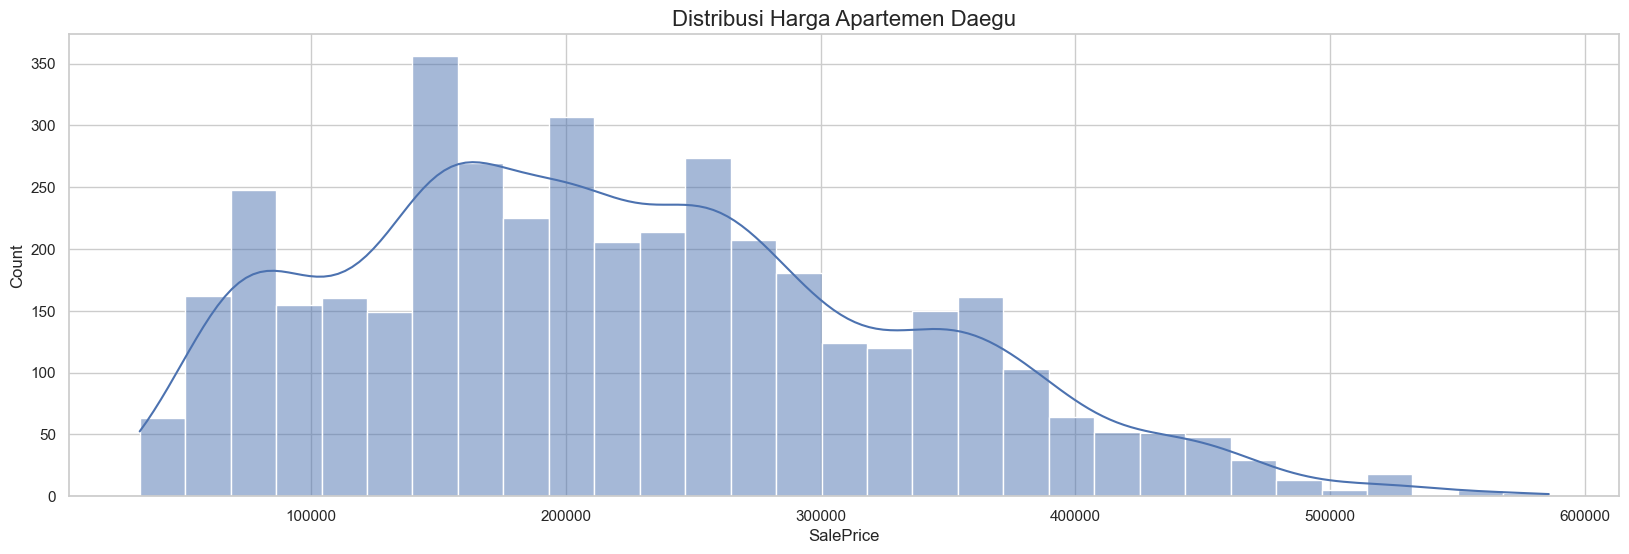

In [11]:
# Khusus melihat distribusi kolom SalePrice
palette = sns.color_palette('Accent')

plt.figure(figsize=(20,6))
sns.histplot(data=df, x='SalePrice', kde=True, palette=palette)
plt.title('Distribusi Harga Apartemen Daegu', size=16)

plt.show()

In [12]:
# Harga termurah dan termahal
apartemen_termurah = df.loc[df['SalePrice'].idxmin()]
apartemen_termahal = df.loc[df['SalePrice'].idxmax()]

print('Harga Termurah :')
print(apartemen_termurah)
print('\nHarga Termahal :')
print(apartemen_termahal)

Harga Termurah :
HallwayType                            corridor
TimeToSubway                        10min~15min
SubwayStation                         Myung-duk
N_FacilitiesNearBy(ETC)                     5.0
N_FacilitiesNearBy(PublicOffice)            7.0
N_SchoolNearBy(University)                  5.0
N_Parkinglot(Basement)                      0.0
YearBuilt                                  1992
N_FacilitiesInApt                             3
Size(sqf)                                   355
SalePrice                                 32743
Name: 1908, dtype: object

Harga Termahal :
HallwayType                                      terraced
TimeToSubway                                       0-5min
SubwayStation                       Kyungbuk_uni_hospital
N_FacilitiesNearBy(ETC)                               0.0
N_FacilitiesNearBy(PublicOffice)                      3.0
N_SchoolNearBy(University)                            2.0
N_Parkinglot(Basement)                             1270.0
YearB

Dari data diatas dapat diketahui Harga termurah ada di 32.743 Ribu Won dan harga termahal ada di 585.840 Ribu Won.
Jika diperhatikan juga grafik diatas harga apartemen di Daegu ini tidak terdistribusi normal,sehingga dapat dikatakan harga apartemen cenderung 
berada di kisaran harga menengah.

## **Data Correlation**

#### **Hubungan(korelasi) antar Kolom Numerik**

Berikut kita akan coba melihat bagaimana korelasi antar kolom numerik yang ada pada dataset

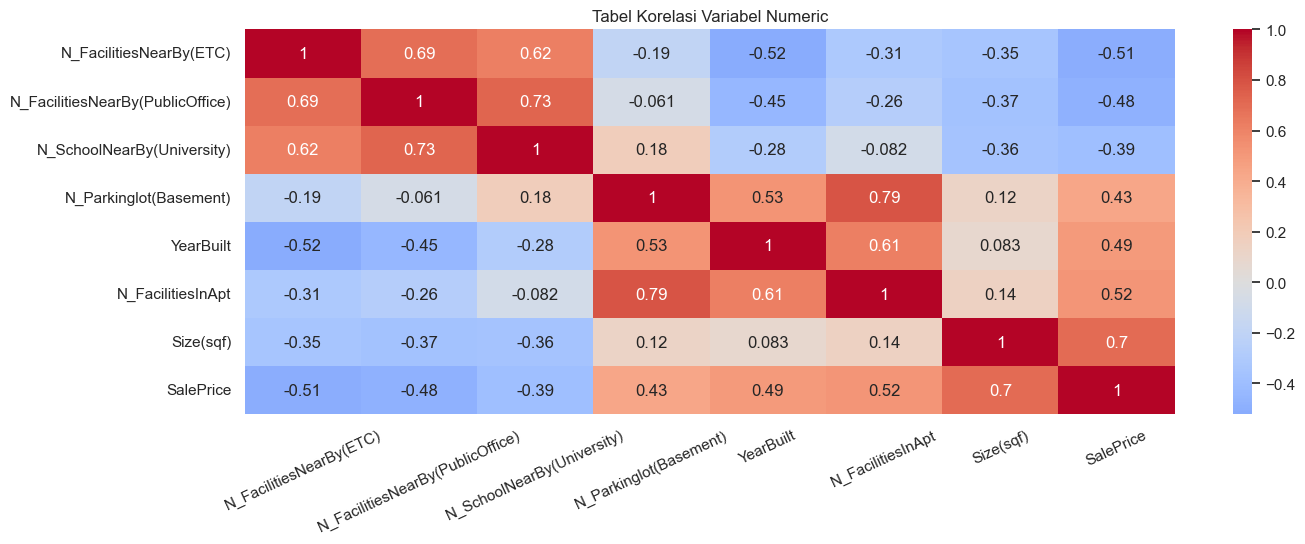

In [13]:
# Matriks korelasi

plt.figure(figsize=(15,5))
sns.heatmap(data=df.corr(numeric_only=True, method='spearman'), 
            annot=True,
            cmap= 'coolwarm',
            center=0)
plt.xticks(rotation=25)

plt.title('Tabel Korelasi Variabel Numeric', size=12)
plt.show()

Berdasarkan data korelasi yang ditampilkan, berikut adalah beberapa gambaran umum terkait hubungan antara variabel numerik dalam kumpulan data:
- **Fasilitas Terdekat (ETC, PublicOffice, Universitas)**:<br>
Terdapat korelasi yang kuat dan positif antara jumlah fasilitas terdekat (ETC, PublicOffice, dan Universitas). Hal ini menunjukkan bahwa jika suatu properti dekat dengan satu jenis fasilitas, maka kemungkinan besar properti tersebut dekat dengan fasilitas lainnya.
- **YearBuilt dan N_FacilitiesInApt**:<br>
Tahun dibangun (YearBuilt) memiliki korelasi positif sedang dengan jumlah fasilitas di dalam apartemen (N_FacilitiesInApt), yang menunjukkan bahwa properti yang lebih baru cenderung memiliki lebih banyak fasilitas internal.
- **YearBuilt dan SalePrice**:<br>
Terdapat korelasi positif sedang antara tahun dibangun dan harga jual, yang dapat menunjukkan bahwa properti yang lebih baru dapat dijual dengan harga yang lebih tinggi.
- **Ukuran dan Harga Jual**:<br>
Ukuran properti (Ukuran(sqf)) memiliki korelasi positif yang kuat dengan harga jual (Harga Jual), yang menegaskan bahwa ukuran properti merupakan faktor penting dalam menentukan harga jual properti.
- **Fasilitas Terdekat dan Harga Jual**:<br>
Tidak ada korelasi signifikan antara jumlah fasilitas terdekat (ETC, Kantor Publik, Universitas) dan harga jual, yang menunjukkan bahwa keberadaan fasilitas ini mungkin tidak memiliki pengaruh langsung yang kuat terhadap harga jual properti.
- **N_Parkinglot(Basement) dan Harga Jual**:<br>
Jumlah tempat parkir di basement (N_Parkinglot(Basement)) menunjukkan korelasi positif yang lemah dengan harga jual, yang menunjukkan bahwa ketersediaan tempat parkir mungkin bukan faktor penentu utama dalam menetapkan harga properti.

Dengan mengetahui informasi diatas maka akan sangat membantu pelaku bisnis apartemen di Daegu,dimana dengan demikian dapat lebih memahami hal-hal yang paling dominan
bisa mempengaruhi nilai jual serta hal apasaja yang perlu di perbaiki untuk mendorong peningkatan nilai jual.

#### **Hubungan(korelasi) antar Harga dan kolom Categorical**

Berikut kita akan melihat hubungan antara Harga(Sales Price) dan kolom Categorical( kolom lainnya ).
Karena distribusi kolom SalePrice tidak normal maka akan diambil nilai median untuk melihat hubungannya.

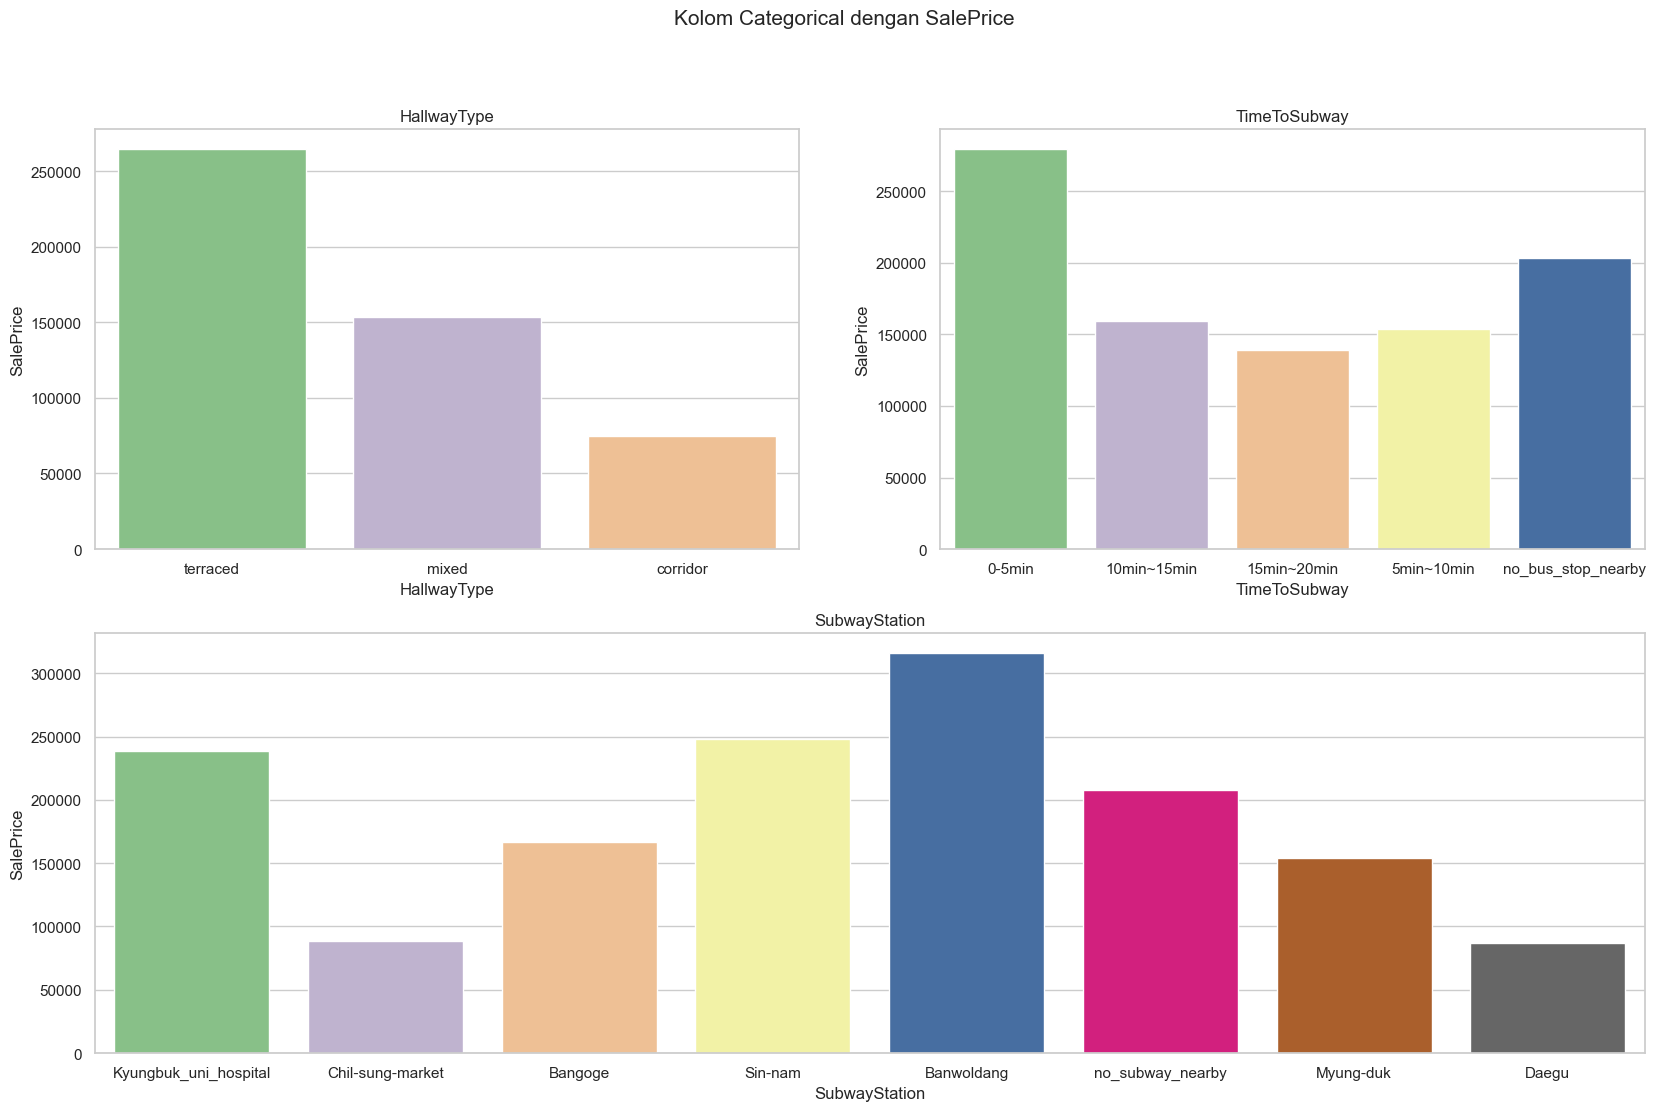

In [14]:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
sns.barplot(data=df, x='HallwayType', y='SalePrice', estimator=np.median, ci=None, palette=palette)
plt.title('HallwayType', size=12)

plt.subplot(2,2,2)
custom_order = ['0-5min', '5min~10min', '10min~15min', '15min~20min', 'no_bus_stop_nearby']
sns.barplot(data=df, x='TimeToSubway', y='SalePrice', estimator=np.median, ci=None, palette=palette)
plt.title('TimeToSubway', size=12)

plt.subplot(2,2,(3,4))
custom_order1 = ['Kyungbuk_uni_hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'Myung-duk', 'Daegu', 'no_subway_nearby']
sns.barplot(data=df, x='SubwayStation', y='SalePrice', estimator=np.median, ci=None, palette=palette)
plt.title('SubwayStation', size=12)

plt.suptitle('Kolom Categorical dengan SalePrice', size=15)
plt.show()

Berdasarkan hasil di atas, kita dapat melihat beberapa hal berikut :
- Kolom HallwayType, TimeToSubway, SubwayStation memiliki hubungan dengan SalePrice dikarenakan, disetiap tipenya memiliki nilai median SalePrice yang berbeda-beda
- Jenis HallwayType yang memiliki SalePrice paling mahal adalah terraced, dan termurah adalah corridor
- Jenis TimeToSubway yang memiliki SalePrice paling mahal adalah 0-5min, dan termurah adalah 15-20 min
- Jenis SubwayStation yang memiliki SalePrice paling mahal adalah Banwoldang, dan termurah adalah Daegu
- Seluruh data Kategorial yang ada pada data kita, memiliki hubungan dengan SalePrice

# **4. Data Preparation**

Untuk dapat membuat keputusan yang lebih baik dan lebih tepat,maka perlu dilakukan oembersihan data seperti jika ada **Missing Value,Duplicate,
Outliers**,sehingga nantinya dapat dipakai untuk analisa lebih lanjut.

In [15]:
# import library persiapan data (data preprocessing)
# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [16]:
# Fungsi untuk menghitung persentase outliers
def calculate_outlier_percentage(column):
    if column.dtype in [np.float64, np.int64]:
        z_scores = np.abs(stats.zscore(column.dropna()))  # Menghitung skor Z, mengabaikan nilai NaN
        return np.sum(z_scores > 3) / len(column) * 100  # Menghitung persentase outliers
    return 0

# Membuat DataFrame dengan informasi yang diinginkan
df_info = pd.DataFrame({
    'Features'           : df.columns.values,
    'Data Type'         : df.dtypes.values,
    'Null Value (%)'     : df.isna().mean().values * 100,
    'Unique Value'          : df.nunique().values,
    'Duplicate Data'         : df.duplicated().sum(),
    'Negative Value': [len(df[col][df[col] < 0]) / len(df) * 100 
                           if col in df.select_dtypes(include=np.number).columns else 0 
                           for col in df.columns],
    'Outlier(%)'        : [calculate_outlier_percentage(df[col]) for col in df.columns],
    'Unique Sample'     : [df[col].unique() for col in df.columns]
}).round(3)

df_info

,Features,Data Type,Null Value (%),Unique Value,Duplicate Data,Negative Value,Outlier(%),Unique Sample
0,HallwayType,object,0.0,3,1422,0.0,0.000,"[terraced, mixed, corridor]"
1,TimeToSubway,object,0.0,5,1422,0.0,0.000,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,object,0.0,8,1422,0.0,0.000,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),float64,0.0,4,1422,0.0,0.000,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0.0,8,1422,0.0,0.000,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),float64,0.0,6,1422,0.0,0.000,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0.0,20,1422,0.0,0.000,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,int64,0.0,16,1422,0.0,0.000,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,int64,0.0,9,1422,0.0,0.000,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,0.0,89,1422,0.0,0.703,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


Berikut Ringkasan singkat terkait dataset :

- **Tipe Data**: Ada tipe data numerik (int64 & float64) dan kategoris (objek).
- **Nilai Null**: Tidak ada kolom yang memiliki nilai null dalam kumpulan data ini
- **Nilai Unik**: Dapat dilihat berapa banyak nilai unik yang ada di kolom unique value
- **Data Duplikat**: Ada 1422 baris data yang merupakan duplikat. data duplikat akan di cek lebih lanjut,agar analisa tidak menyimpang.
- **Nilai Negatif**: Tidak ada data negatif dalam dataset yang digunakan
- **Anomali**: Ada anomali di kolom Ukuran (sqf) dan Harga Jual. Meskipun persentasenya sangat kecil (kurang dari 1%).

Secara umum, dataset ini dapat dikatakan cukup baik karena tidak terlalu banyak permasalahan data yang perlu ditangani.

# **Handling Data Anomalies**

#### **Pengecekan nilai Unique**

- **Berikut dilakukan pengecekan nilai unik pada kolom Categorical**

In [17]:
pd.set_option('display.max_colwidth', None)

cat = []

for i in df.describe(include=object).columns:
    cat.append([i, list(df[i].drop_duplicates().values)])

df_cat = pd.DataFrame(columns=['feature', 'unique'], data=cat)
df_cat

,feature,unique
0,HallwayType,"[terraced, mixed, corridor]"
1,TimeToSubway,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"


Dari data kolom categorical diperlukan terlihat pola yang kurang seragam sehingga harus di lakukan perubahan/penyesuaian

In [18]:
# Perbaiki data 'TimeToSubway'
df['TimeToSubway'] = df['TimeToSubway'].replace({
    '10min~15min': '10-15min',
    '15min~20min': '15-20min',
    '5min~10min': '5-10min'
})

# cek apakah data sudah berubah
df['TimeToSubway'].unique()

array(['0-5min', '10-15min', '15-20min', '5-10min', 'no_bus_stop_nearby'],
      dtype=object)

In [19]:
# Perbaiki data SubwayStation
df['SubwayStation'] = df['SubwayStation'].replace({
    'Kyungbuk_uni_hospital': 'Kyungbuk-uni-hospital'
})

# cek apakah data sudah berubah
df['SubwayStation'].unique()

array(['Kyungbuk-uni-hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'no_subway_nearby', 'Myung-duk', 'Daegu'],
      dtype=object)

- **Berikut dilakukan pengecekan nilai unik pada kolom Numerical**

In [20]:
num = []

for i in df.describe().columns[:-1]:
    num.append([i, df[i].dtype, list(df[i].drop_duplicates().values)])

df_num = pd.DataFrame(columns=['feature','dataType','unique'], data=num)
df_num

,feature,dataType,unique
0,N_FacilitiesNearBy(ETC),float64,"[0.0, 1.0, 5.0, 2.0]"
1,N_FacilitiesNearBy(PublicOffice),float64,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
2,N_SchoolNearBy(University),float64,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
3,N_Parkinglot(Basement),float64,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
4,YearBuilt,int64,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
5,N_FacilitiesInApt,int64,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
6,Size(sqf),int64,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


Berdasarkan data yang ditampilkan : 
N_FacilitiesNearBy(ETC)
N_FacilitiesNearBy(PublicOffice)
N_SchoolNearBy(University)
N_Parkinglot(Basement) 

atas data pada 4 kolom ini,walaupun tipe data float namun isi data cenderung integer. Sehingga tipa data ( data type) atas kolom ini akan di rubah

In [21]:
# mengubah tipe data (dataType)
kolom_float = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)']

for i in kolom_float:
    df[i] = df[i].astype('int64')

# memastikan tipe data sudah berubah
df[['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)']].dtypes

N_FacilitiesNearBy(ETC)             int64
N_FacilitiesNearBy(PublicOffice)    int64
N_SchoolNearBy(University)          int64
N_Parkinglot(Basement)              int64
dtype: object

#### **Data Duplicated**
Pada tahap ini kita akan coba mengecek data duplicated. Data ini perlu di cek dikarenakan akan memberikan dampak negatif dalam membangun Machine Learning. Jika terlalu banyak data duplicate, maka model akan terlalu berlajar dengan data tersebut yang menyebabkan overfitting (hasil prediksi pada training terlalu bagus dan hasil prediksi pada testing tidak bagus). 

In [22]:
# cek duplicate
print(f'data duplicate :{df.duplicated().sum()}')
print(f'persentase data duplicate :{round((df.duplicated().sum()/ len(df)*100),2)}%')

data duplicate :1422
persentase data duplicate :34.49%


In [23]:
# Data Duplikat,cek semua kolom harus unik
df[df.duplicated()].sort_values(by=['SubwayStation', 'SalePrice'])

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
3824,mixed,5-10min,Bangoge,5,5,4,798,2005,7,572,72256
4080,mixed,5-10min,Bangoge,5,5,4,798,2005,7,572,72654
2768,mixed,5-10min,Bangoge,5,5,4,798,2005,7,572,73008
1203,mixed,5-10min,Bangoge,5,5,4,798,2005,7,572,73053
1436,mixed,5-10min,Bangoge,5,5,4,798,2005,7,572,73053
...,...,...,...,...,...,...,...,...,...,...,...
2598,terraced,5-10min,no_subway_nearby,0,1,1,1321,2015,10,910,392035
2793,terraced,5-10min,no_subway_nearby,0,1,1,1321,2015,10,910,393805
3048,terraced,5-10min,no_subway_nearby,0,1,1,1321,2015,10,910,393805
3562,terraced,5-10min,no_subway_nearby,0,1,1,1321,2015,10,910,393805


Data duplicate ini akan dihapus, diharapkan dalam menghapus data duplicate ini dapat membuat model yang lebih akurat dan menghindari adanya overfitting

In [24]:
# menghapus data duplicated
df_clean = df.copy()
df_clean = df_clean.drop_duplicates()

# jumlah baris dan kolom setelah data duplicated di hapus
num_rows, num_cols = df_clean.shape
print(f"Jumlah Baris: {num_rows}, Jumlah Kolom: {num_cols}")

Jumlah Baris: 2701, Jumlah Kolom: 11


Telihat jumlah baris sudah berkurang setelah data duplikat di hapus

#### **Pengecekan Outliers**

Tujuan pengecekan Outliers yaitu untuk melihat data  anomali atau adanya kesalahan terhadap data (salah input). Dalam prosesnya, jika kita menemukan data outliers yang jaraknya terlalu jauh dengan data lainnya,maka ada kemungkinan akan kami hapus. Tujuannya adalah untuk meningkatkan kualitas machine learning dan mengurangi keberagaman data. 

Berikut akan coba ditampilkan kemungkinan outliers dari data-data numerikal dari dataset:

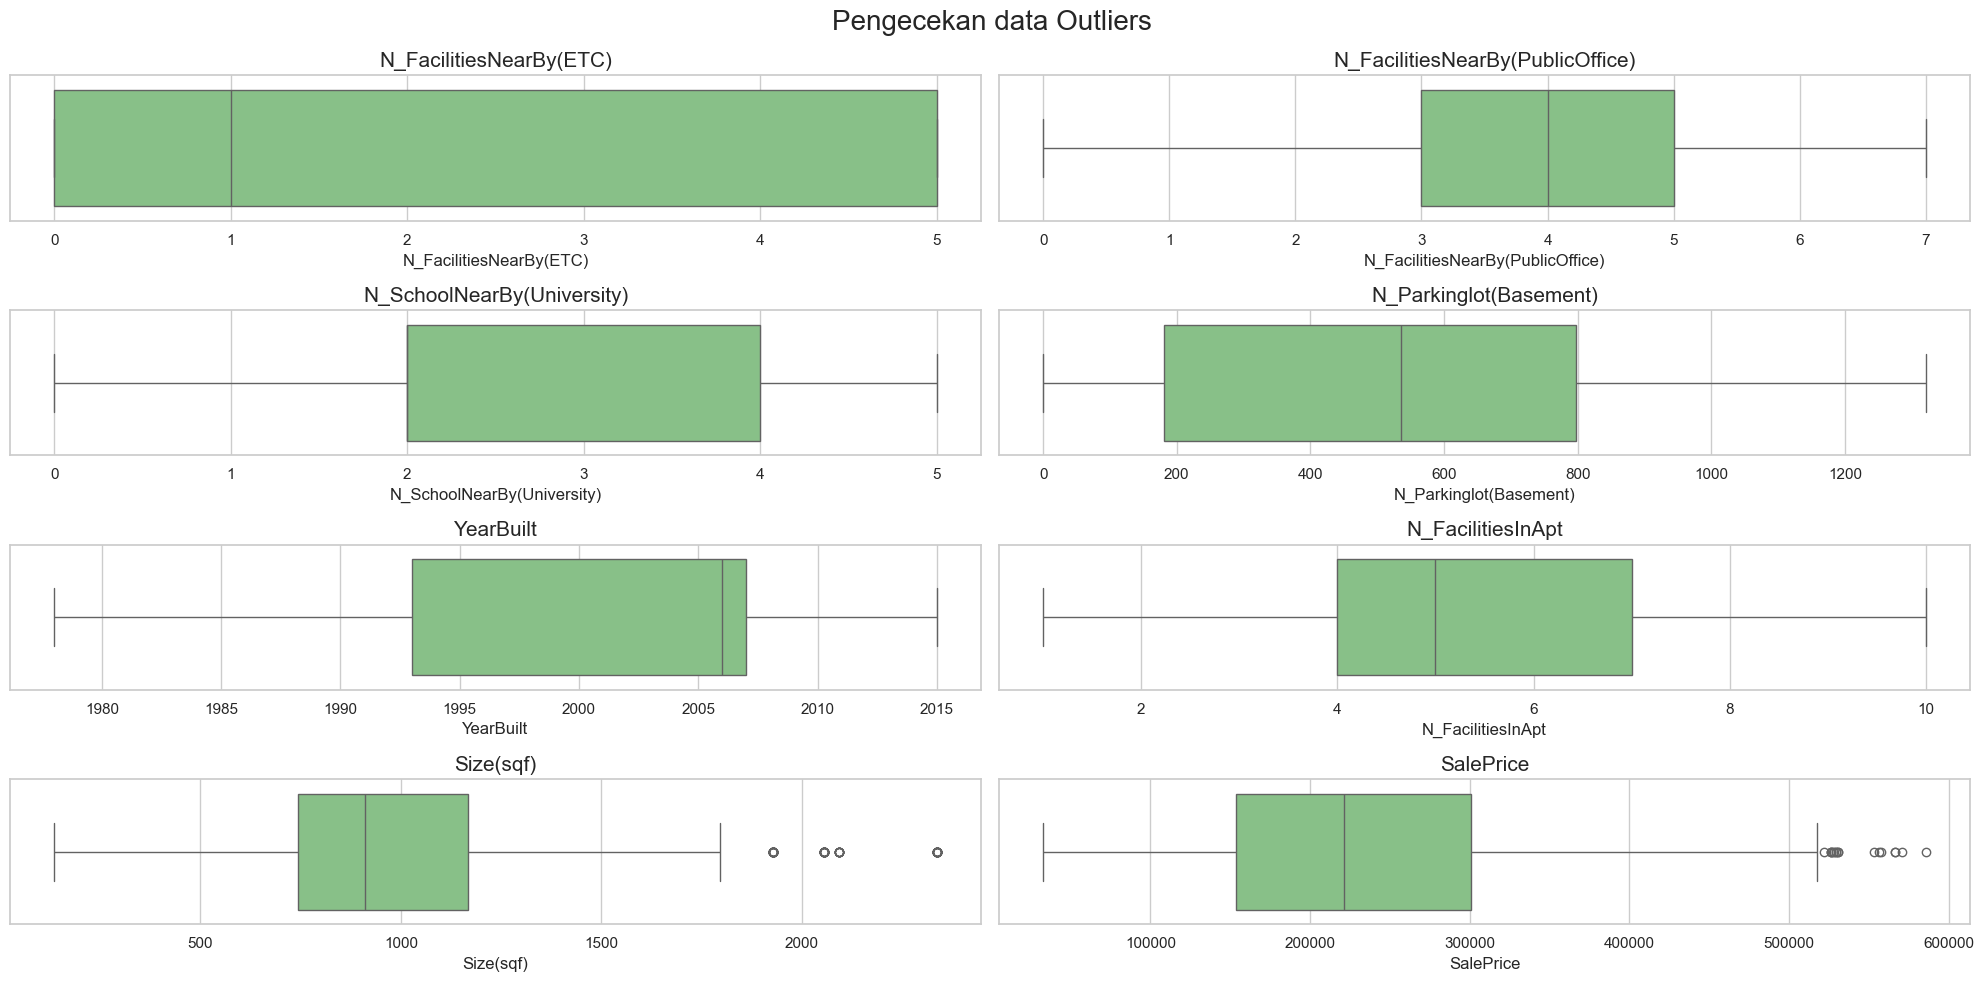

In [25]:
num_feature = df_clean.describe().columns
plot = 1

plt.figure(figsize=(20,10))
for feature in num_feature:
    plt.subplot(4,2,plot)
    sns.boxplot(data=df_clean, x=feature, palette=palette)
    plt.title(feature, size=15)
    plt.tight_layout()
    plot += 1

plt.suptitle('Pengecekan data Outliers', size=20)
plt.tight_layout()
plt.show()


Dari Hasil pengecekan, kita dapat melihat dan menyimpulkan data outliers terdapat pada kolom **Size(sqf)** dan **SalePrice**.Atas dasar ini
maka akan dilakukan pengcekan lebih lanjut

In [26]:
#fungsi untuk pengecekan outliers
def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    print(f'IQR: {iqr}')

    batas_bawah = q1 - (iqr * 1.5)
    batas_atas = q3 + (iqr * 1.5)
    print(f'batas_bawah : {batas_bawah}')
    print(f'batas_atas : {batas_atas}')   

#### **Size (sqf)**

Dari boxplot **Size(sqf)** data outliers terlihat berada di sebelah kanan. Maka dapat dikatakan data  outliers berada di batas atas (upper bound). 
Berikut coba dicek batas bawah dan batas atas menggunakan fungsi diatas.

In [27]:
# Cek iqr, batas atas dan bawah
outliers(df_clean['Size(sqf)'])

IQR: 424.0
batas_bawah : 107.0
batas_atas : 1803.0


In [28]:
# Cek persentase data outliers pada Size(sqf)
print("jumlah data outliers :", len(df_clean[df_clean['Size(sqf)'] > 1803.0]))
print("persentase data outliers :", round(((len(df_clean[df_clean['Size(sqf)'] > 1803.0]) / len(df_clean))*100), 2),'%')

jumlah data outliers : 84
persentase data outliers : 3.11 %


In [29]:
# Cek statistik deskiptif size
df['Size(sqf)'].describe()

count    4123.000000
mean      954.630851
std       383.805648
min       135.000000
25%       644.000000
50%       910.000000
75%      1149.000000
max      2337.000000
Name: Size(sqf), dtype: float64

#### **SalePrice**

Dari boxplot **SalePrice** data outliers itu berada di sebelah kanan. Maka dapat dikatakan data outliers berada di batas atas (upper bound). Selanjutnya akan dicek, berapa batas atas dari data **SalePrice** kita.

In [30]:
# Cek iqr, batas atas dan bawah
outliers(df_clean['SalePrice'])

IQR: 147345.0
batas_bawah : -67478.5
batas_atas : 521901.5


In [31]:
# Cek persentase data outliers pada Saleprice
print("jumlah data outliers :", len(df_clean[df_clean['SalePrice'] > 521901.5]))
print("persentase data outliers :", round(((len(df_clean[df_clean['SalePrice'] > 521901.5]) / len(df_clean))*100), 2),'%')

jumlah data outliers : 17
persentase data outliers : 0.63 %


In [32]:
# Cek statistik deskiptif size
df['SalePrice'].describe()

count      4123.000000
mean     221767.926995
std      106739.839945
min       32743.000000
25%      144752.000000
50%      209734.000000
75%      291150.000000
max      585840.000000
Name: SalePrice, dtype: float64

Jika dilihat berdasarkan data diatas, jumlah data outliers pada kolom **SalePrice** hanya ada 17 (0.63%) dari data dan jumlah ini cenderung kecil. Ketika data ini dilihat secara detail, ternyata merupakan apartemen dengan tipe terraced, hanya menempuh 0-5 menit saja jarak ke stasiun bawah tanah dan memiliki luas yang besar. Data ini dimungkinkan terjadi, bukan merupakan kesalahan penginputan. Sehingga kami juga memutuskan untuk tidak menghapus data ini, dikarenakan jumlahnya cenderung kecil dan merupakan data real. Sehingga diharapkan tidak terlalu berpengaruh untuk menyebabkan bias pada model.

#### **Clean Dataset**

Berikut akan di cek kembali data yang akan dipergunakan untuk membangun Machine Learning

In [33]:
# cek dataset
display(df_clean.head(), df_clean.tail())

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk-uni-hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10-15min,Kyungbuk-uni-hospital,1,5,1,0,1986,4,914,150442
2,mixed,15-20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5-10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
4116,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,818,290265
4117,mixed,15-20min,Myung-duk,5,6,5,536,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914,323008
4119,mixed,15-20min,Myung-duk,5,6,5,536,1993,4,1451,242477
4121,corridor,5-10min,Daegu,2,5,0,76,1985,3,676,73451


In [34]:
# Cek info dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


In [35]:
# Cek jumlah baris dan kolom 
num_rows, num_cols = df_clean.shape
print(f"Jumlah Baris: {num_rows}, Jumlah Kolom: {num_cols}")

Jumlah Baris: 2701, Jumlah Kolom: 11


In [36]:
# Cek jumlah baris yang dieliminasi
selisih = df.shape[0] - df_clean.shape[0]
selisih_persen = round(((selisih / df.shape[0]) * 100),2)
print(f"Jumlah baris terliminasi: {selisih}") 
print(f"Persentase baris terliminasi: {selisih_persen}%") 

Jumlah baris terliminasi: 1422
Persentase baris terliminasi: 34.49%


Summary :
- Dataset memiliki tipe data yang sudah clean yaitu numerical --> tipenya int64  dan Categorical --> tipenya object
- Dataset final yang akan digunakan terdiri dari 2701 baris serta 11 Kolom
- Jumlah baris dari dataset yang tereliminasi sebanyak 1422 setara dengan 34.49% --> dieliminasi  karena duplikat

### **Data Encoding dan Data Scaling**

**Feature Engineering**
<br>
Feature Engineering adalah proses di mana kita mengubah fitur-fitur yang ada dalam dataset untuk meningkatkan kualitas model dan meningkatkan kinerja algoritma Machine Learning. Tahap ini penting dilakukan agar data terrepresentasi menjadi lebih baik, sehingga model dapat memahami pola-pola yang ada dalam data dengan lebih baik. Berikut tahapan yang akan kami jalankan :

1. **Mengubah Data Kategorikal menjadi Numerik**
<br>
    Pada tahap ini kita akan mengubah/ encoding tipe data kategori menjadi numerik agar dapat menjadi fitur dalam Machine Learning.
    -  OneHot Encoding:
        - Kami akan menggunakan OneHot pada kolom **HallwayType**, dikarenakan jumlahnya hanya 3. Tipe setiap apartemen kami asumsikan adalah setara (variabel nominal)
    - Binary Encoding :
        - Kami akan menggunakan Binary pada kolom **SubwayStation**, dikarenakan jumlahnya lumayan banyak (8) dan diasumsikan setara (variabel nominal)
    - Ordinal Encoding:
        - Kami akan menggunakan Ordinal pada kolom **TimeToSubway**. Fitur ini merupakan variabel ordinal, dikarenakan datanya berisi waktu yang memiliki tingkatan. Maka kami akan membuat unit yang paling dekat dengan stasiun bawah tanah merupakan tingkatan tertinggi dan  unit yang tidak dekat dengan stasiun bawah tanah adalah tingkatan terendah. 
<br><br>
2. **Scaling Data Numerik**
<br>
Scaling adalah metode untuk melakukan transformasi terhadap data numerik agar antar variabel(fitur) memiliki skala yang sama. Kami akan melakukan Scaling (mengubah skala) pada seluruh data numerik agar memiliki nilai yang serupa atau setara. Pada kolom YearBuilt juga kami scaling, dikarenakan dilihat korelasinya YearBuilt dan SalePrice memiliki hubungan linear. 
<br><br>Metode scaling yang kami gunakan adalah Robust Scaler. Metode ini kami pilih karena saat kita melihat persebaran data kolom Size di atas, data masih memiliki data outliers. Robust Scaler cocok digunakan dikarenakan tidak sensitif terhadap data outliers. Cara Kerja Robust Scaler adalah dengan data dikurangi dengan nilai kuartil 1 lalu dibagi dengan selisih antara kuartil 3 dan kuartil 1. Berikut rumusnya berikut :
<br>
![Cover](image-4.png)
<br>
Selanjutnya kami akan membuat variabel transformer untuk mempermudah kita dalam mentransformasikan seluruh fitur yang kita miliki

In [37]:
# mapping untuk ordinal encoder
ordinal_encoding = [{'col':'TimeToSubway',
                     'mapping':{'no_bus_stop_nearby':1, 
                                '15-20min':2, 
                                '10-15min':3, 
                                '5-10min':4,
                                '0-5min':5}}]

In [38]:
# membuat variabel transformer
transformer = ColumnTransformer([
    ('oneHot', OneHotEncoder(drop='first'), ['HallwayType']),
    ('binary', BinaryEncoder(), ['SubwayStation']),
    ('ordinal', OrdinalEncoder(cols='TimeToSubway', mapping=ordinal_encoding), ['TimeToSubway']),
    ('scaler', RobustScaler(), ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
                              'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
                              'N_FacilitiesInApt', 'Size(sqf)'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('oneHot', OneHotEncoder(drop='first'),
                                 ['HallwayType']),
                                ('binary', BinaryEncoder(), ['SubwayStation']),
                                ('ordinal',
                                 OrdinalEncoder(cols='TimeToSubway',
                                                mapping=[{'col': 'TimeToSubway',
                                                          'data_type': dtype('O'),
                                                          'mapping': no_bus_stop_nearby    1
15-20min              2
10-15min              3
5-10min               4
0-5min                5
dtype: int64}]),
                                 ['TimeToSubway']),
                                ('scaler', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_Parkinglot(Basement)', 'YearBuilt',
                                  'N_FacilitiesInApt', 'Size(sqf)'])])

# **5. Modeling & Evaluation**

In [39]:
# import library permodelan dan evaluasi 
# train test split
from sklearn.model_selection import train_test_split

# cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor

# metric evaluasi
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### **Define X dan y**
Memisahkan data mejadi Feature dan Target.
- X (feature) adalah seluruh kolom yang ada didataset kita kecuali SalePrice
  Ini berarti X akan berisi fitur-fitur yang digunakan untuk memprediksi SalePrice
- y (target) adalah kolom SalePrice  --> target atau variable yang ingin di prediksi

In [40]:
X = df_clean.drop(columns='SalePrice')
y = df_clean['SalePrice']

display(X.head(), y.head())

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
0,terraced,0-5min,Kyungbuk-uni-hospital,0,3,2,1270,2007,10,1387
1,terraced,10-15min,Kyungbuk-uni-hospital,1,5,1,0,1986,4,914
2,mixed,15-20min,Chil-sung-market,1,7,3,56,1997,5,558
3,mixed,5-10min,Bangoge,5,5,4,798,2005,7,914
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743


0    346017
1    150442
2     61946
3    165486
4    311504
Name: SalePrice, dtype: int64

### **Data Splitting**
Selanjutnya dataset akan dibagi menjadi data traning dan data testing. Tujuannya yaitu agar kita bisa melakukan perbandingan hasil prediksi SalePrice dari data training dan testing. Karena data yang kita miliki tidak terlalu banyak (2701 baris), maka data akan dibagi manjadi dengan perbandingan training dan testing menjadi 80:20.

In [41]:
# splitting data training dan testing menjadi 80 : 20 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=30)

### **CrossValidation**

Data training akan dibagi menjadi beberapa bagian untuk dilalukan CrossValidation. Proses yang dilakukan dalam CrossValidation adalah melakukan generalisasi berulang kali secara bergantian, lalu menggabungkan hasilnya. Hal ini bertujuan agar kita bisa mendapatkan model yang stabil. Model yang stabil dan hasil yang bagus (RMSE, MAE, dan MAPE) kecil akan dipilih sebagai model untuk membangun Machine Learning.

Proses Looping akan dilakukan sekaligus ke beberapa model regresi dan menggunakan evaluasi matriks RMSE, MAE dan MAPE untuk melihat model apa yang terbaik dan lebih tepat

In [42]:
# define model algoritma
lr = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=30)
rf = RandomForestRegressor(random_state=30)
xgb = XGBRegressor(random_state=30)
ttr = TransformedTargetRegressor()
ada = AdaBoostRegressor(random_state=30)

# ensemble (voting)
voting = VotingRegressor([
    ('clf1', lr),
    ('clf2', knn),
    ('clf3', tree)
])

# ensemble (stacking)
stacking = StackingRegressor(
    estimators=[
        ('clf1', lr),
        ('clf2', knn),
        ('clf3', tree)        
    ], final_estimator= lr
)

model = [lr, knn, tree, rf, xgb, ttr, ada, voting, stacking]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik tiap metrik (RMSE, MAE, MAPE)
for i in model:
    
    crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=30)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [43]:
# Evaluasi hasil dari 9 algoritma yang digunakan
model_evaluasi = pd.DataFrame({
    'Model': ['Linear Regression', 'KNeighbors Regressor','DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'TransformedTarget Regressor', 'AdaBoost Regressor', 'Voting Regresor', 'Stacking Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

model_evaluasi.sort_values('Mean_MAE', ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
4,XGBoost Regressor,-46505.282813,1074.637793,-37305.160937,1021.489609,-0.190121,0.005901
2,DecisionTree Regressor,-46533.854177,1042.069536,-37337.636907,995.016995,-0.190258,0.005826
3,RandomForest Regressor,-46564.710010,1022.321774,-37358.705649,997.165519,-0.190951,0.005620
8,Stacking Regressor,-46519.567876,1116.237695,-37473.598948,1017.801445,-0.190991,0.006318
7,Voting Regresor,-47015.553973,1204.420927,-37974.700959,1128.261807,-0.193130,0.006972
1,KNeighbors Regressor,-50052.848686,2181.554871,-38890.103333,1569.782383,-0.196097,0.009544
0,Linear Regression,-52198.233736,1013.998752,-42092.624932,985.596222,-0.215672,0.007356
5,TransformedTarget Regressor,-52198.233736,1013.998752,-42092.624932,985.596222,-0.215672,0.007356
6,AdaBoost Regressor,-51053.208302,1173.365539,-43114.115445,1202.740292,-0.242686,0.010080


Dari hasil crossvalidation kita dapat melihat XGBoost Regressor memiliki performa model yang paling baik. Jika diperhatikan XGBoost Regressor sedikit lebih baik dibandingkan DecisionTree Regressor. Hal ini ditunjukkan dari nilai RMSE, MAE dan MAPE lebih rendah dibanding model lainnya. Dikarenakan perbedaannya tidak terlalu jauh untuk kedua model tersebut, maka akan dicoba melakukan predict ke data tes untuk kedua model ini.

**Predict to Test Set with the Benchmark Model**

Dari hasil sebelumnya maka akan dilakukan Prediksi pada test set dengan menggunakan model **XGBoost Regressor** dan **DecisionTree Regressor**

In [44]:
models = {
    'XGBoost Regressor': XGBRegressor(random_state=30),
    'DecisionTree Regressor': DecisionTreeRegressor(random_state=30)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning.sort_values('MAE', ascending=True)

,RMSE,MAE,MAPE
XGBoost Regressor,47158.468508,38362.914062,0.194926
DecisionTree Regressor,47776.832072,38566.575019,0.198203


Berdasarkan hasil RMSE, MAE dan MAPE di atas,terlihat hasil dari kedua model ini memiliki perbedaan yang tidak terlalu jauh. Maka akan dilakukan hyperparameter Tunning pada kedua model ini untuk mencari hasil yang paling baik.

### **Hyperparameter Tunning**

Dalam kondisi ini Rank metrik yang di pilih adalah **MAE (Mean Absolute Error)** atas parameter yang akan digunakan ,denngan mempertimbangkan :
- Mengukur rata-rata kesalahan prediksi tanpa mempertimbangkan arah kesalahan.
- Tidak sensitif terhadap outlier seperti lainnya contoh RMSE (Root Mean Squared Error)
- kita juga ingin menentukan nilai error sebenarnya,bukan dalam bentuk persentase--> nilai errornya adalah nilai yang paling kecil

Terkait dengan dataset maka dapat dikatakan kita memilih selisih harga prediksi apartemen dengan harga aktual apartemen yang paling rendah.

#### **XGBoost Regressor**
XGBoost Regressor adalah implementasi algoritma boosting yang kuat dan populer untuk masalah regresi. XGBoost menggunakan pendekatan gradient boosting untuk membangun model prediksi yang kuat dengan menggabungkan beberapa model lemah.

Berikut adalah beberapa parameter yang akan gunakan untuk melakukan tuning :
1. **n_estimators** adalah jumlah pohon keputusan yang akan dibangun. Semakin besar jumlahnya, maka akan semakin kompleks modelnya.
2. **max_depth** adalah jumlah kedalaman maksimum dari setiap pohon. Nilai yang besar memungkinkan model untuk lebih memahami data training, namun dapat menyebabkan overfitting
3. **learning_rate** adalah tingkat pembelajaran yang akan mengontrol seberapa besar langkah pembelajaran yang diambil. Nilai yang lebih kecil membuat model akan belajar perlahan dan lebih stabil, tetapi membutuhkan lebih banyak pohon untuk mencapai kinerja yang baik. Nilai yang lebih besar dapat membuat belajar lebih cepat namun kurang stabil. 
4. **gamma** adalah parameter yang mengontrol ketidakmampuan (penurunan dalam fungsi tujuan) yang diperlukan untuk melakukan pemisahan pada tingkat node atau disebut regularisasi. Node adalah titik di mana model membuat keputusan yang membantu mencegah pohon terlalu rumit.
5. **colsample_bytree** adalah seberapa banyak fitur (kolom) yang digunakan dalam setiap iterasi pohon. Membantu mengontrol keragaman antar pohon dalam ensemble. 
6. **subsample** adalah seberapa banyak data training yang digunakan dalam setiap iterasi pohon. Ini dapat membantu masalah overfitting dengan mengizinkan model melihat subset yang berbeda dari setiap iterasi.
7. **reg_alpha** adalah parameter yang mengendalikan kompleksitas model dengan mencegah fitur yang tidak relevan
8. **reg_lambda** adalah parameter yang mengontrol kompleksitas model dengan mencegah bobot pohon yang sangat besar

In [45]:
#parameter
param_XGB = {
    "model__n_estimators" : [100, 150],
    "model__max_depth" : [3, 4, 5, 6],
    "model__learning_rate" : [0.1, 0.2, 0.3],
    "model__gamma" : [0.001, 0.01, 0.1, 1, 10],
    "model__colsample_bytree" : [0.3, 0.5, 0.7],
    "model__subsample" : [0.5, 0.7, 0.9],
    "model__reg_alpha" : [0.001, 0.01, 0.1, 1, 10], 
    "model__reg_lambda" : [0.001, 0.01, 0.1, 1, 10]
}

In [46]:
# model terbaik dengan hyperparameter tuning
xgb = XGBRegressor(random_state=30, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
grid_xgb = GridSearchCV(
    estimator_xgb, 
    param_grid= param_XGB,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error',
)

In [47]:
# Fitting data training untuk mencari parameter terbaik
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('oneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['HallwayType']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['SubwayStation']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols='TimeToSubway',
                                                                                        mapping=[{'col': 'TimeToSubway',
                                                                                                  'd...
                         'model__learning_rate': [0.1, 0.2, 0.3],
                         'model__max_depth': [3, 4, 5, 6],
                         'model__n_estimators': [100, 150],
                         'model__reg_alpha': [0.001, 0.01, 0.1, 1, 10],
                         'model__reg_lambda': [0.001, 0.01, 0.1, 1, 10],
                         'model__subsample': [0.5, 0.7, 0.9]},
             refit='neg_mean_absolute_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [48]:
# Melihat hasil tuning dalam bentuk dataframe.
pd.set_option('display.max_columns',None)
grid_xgb_result = pd.DataFrame(grid_xgb.cv_results_).sort_values('rank_test_neg_mean_absolute_error').head(1)
grid_xgb_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bytree,param_model__gamma,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__reg_alpha,param_model__reg_lambda,param_model__subsample,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
19644,0.204996,0.006126,0.03438,0.00495,0.7,0.001,0.3,5,150,10.0,1.0,0.5,"{'model__colsample_bytree': 0.7, 'model__gamma': 0.001, 'model__learning_rate': 0.3, 'model__max_depth': 5, 'model__n_estimators': 150, 'model__reg_alpha': 10, 'model__reg_lambda': 1, 'model__subsample': 0.5}",-46344.089844,-46634.015625,-45829.667969,-46963.210938,-46110.816406,-46376.360156,395.273926,8346,-37453.144531,-37081.15625,-37164.539062,-37177.90625,-36258.769531,-37027.103125,404.079139,1,-0.198606,-0.18753,-0.18726,-0.180688,-0.185223,-0.187862,0.005905,21


In [49]:
# Cek hasil skor dan params terbaik
print('XGBoost')
print('Best_score:', grid_xgb.best_score_)
print('Best_params:', grid_xgb.best_params_)

XGBoost
Best_score: -37027.103125
Best_params: {'model__colsample_bytree': 0.7, 'model__gamma': 0.001, 'model__learning_rate': 0.3, 'model__max_depth': 5, 'model__n_estimators': 150, 'model__reg_alpha': 10, 'model__reg_lambda': 1, 'model__subsample': 0.5}


In [50]:
# Model XGBoost
model = {'XGBoost Regressor': XGBRegressor(random_state=30)}

# Define model terhadap estimator terbaik
xgb_tuning = grid_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

,RMSE,MAE,MAPE
XGBoost Regressor,47128.968926,38200.757812,0.193674


#### **DecisionTree Regressor**

DecisionTree Regressor adalah model regresi yang menggunakan struktur pohon keputusan untuk memprediksi nilai target. Model ini bekerja dengan membagi data menjadi subset berdasarkan fitur-fitur yang paling informatif.DecisionTree Regressor adalah model regresi yang menggunakan struktur pohon keputusan untuk memprediksi nilai target. Model ini bekerja dengan membagi data menjadi subset berdasarkan fitur-fitur yang paling informatif.

Berikut adalah beberapa parameter yang akan kami gunakan :
1. **max_features** adalah jumlah maksimum fitur yang harus dipertimbangkan saat mencari pemisah terbaik.
2. **max_depth** adalah kedalaman maksimum dari pohon. Jika terlalu dalam pohon akan menjadi overfitting
3. **min_samples_split** adalah jumlah minimum sampel yang diperlukan untuk membagi node internal.
4. **min_samples_leaf** adalah jumlah minimun sampel yang diperlukan untuk menjadi daun (node akhir). Ini mengontrol jumlah daun pohon. Nilai yang lebih tinggi dapat menghasilkan pohon yang lebih bersih.

In [51]:
param_tree = {
    "model__max_features" : np.arange(0.1, 1, 0.1),
    "model__max_depth": np.arange(2, 20),
    "model__min_samples_split" : np.arange(2, 20),
    "model__min_samples_leaf"  : np.arange(1, 20),
}

In [52]:
# Benchmark model dengan hyperparameter tuning
tree = DecisionTreeRegressor(random_state=30)

# Membuat algorithm chains
estimator_tree = Pipeline([
        ('preprocessing', transformer),
        ('model', tree)
        ])

crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
grid_tree = GridSearchCV(
    estimator_tree, 
    param_grid= param_tree,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error' 
)

In [53]:
# Fitting data training untuk mencari parameter terbaik
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('oneHot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['HallwayType']),
                                                                        ('binary',
                                                                         BinaryEncoder(),
                                                                         ['SubwayStation']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols='TimeToSubway',
                                                                                        mapping=[{'col': 'TimeToSubway',
                                                                                                  'd...
                         'model__max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'model__min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             refit='neg_mean_absolute_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [54]:
# Melihat hasil tuning terbaik dalam bentuk dataframe.
pd.set_option('display.max_columns',None)
grid_tree_result = pd.DataFrame(grid_tree.cv_results_).sort_values('rank_test_neg_mean_absolute_error').head(1)
grid_tree_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
26679,0.069237,0.007526,0.024631,0.009459,10,0.7,1,5,"{'model__max_depth': 10, 'model__max_features': 0.7000000000000001, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}",-45994.617042,-46316.233241,-45843.846687,-47820.173652,-46306.545967,-46456.283318,705.754422,169,-37144.693861,-36651.196879,-37299.417689,-37895.407152,-36603.167065,-37118.776529,473.485356,1,-0.19522,-0.186893,-0.188168,-0.184917,-0.18575,-0.18819,0.003682,2


In [55]:
# Cek hasil skor dan params terbaik
print('Decision Tree')
print('Best_score:', grid_tree.best_score_)
print('Best_params:', grid_tree.best_params_)

Decision Tree
Best_score: -37118.77652916871
Best_params: {'model__max_depth': 10, 'model__max_features': 0.7000000000000001, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}


In [56]:
# Model DecisionTree
model = {'DecisionTree Regressor': DecisionTreeRegressor(random_state=30)}

# Define model terhadap estimator terbaik
tree_tuning = grid_tree.best_estimator_

# Fitting model
tree_tuning.fit(X_train, y_train)

# Predict test set
y_pred_tree_tuning = tree_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_tree_tuning = np.sqrt(mean_squared_error(y_test, y_pred_tree_tuning))
mae_tree_tuning = mean_absolute_error(y_test, y_pred_tree_tuning)
mape_tree_tuning = mean_absolute_percentage_error(y_test, y_pred_tree_tuning)

score_after_tuning_tree = pd.DataFrame({'RMSE': rmse_tree_tuning, 'MAE': mae_tree_tuning, 'MAPE': mape_tree_tuning}, index=model.keys())
score_after_tuning_tree

,RMSE,MAE,MAPE
DecisionTree Regressor,47292.731437,38437.145157,0.195874


**Perbandingan Performa Model**

Berikut perbandingan performa Model sebelum ditunning dan sesudah ditunning

In [57]:
# gabungan algoritma sebelum dan yang sudah di hyperparameter tunning
score_before_tuning = score_before_tuning.rename(columns={'RMSE' : 'RMSE Before', 'MAE': 'MAE Before', 'MAPE': 'MAPE Before'})

final_score = pd.concat([score_after_tuning_xgb, score_after_tuning_tree], axis=0)
final_score = final_score.rename(columns={'RMSE' : 'RMSE After', 'MAE': 'MAE After', 'MAPE': 'MAPE After'})

display(score_before_tuning, final_score)

,RMSE Before,MAE Before,MAPE Before
XGBoost Regressor,47158.468508,38362.914062,0.194926
DecisionTree Regressor,47776.832072,38566.575019,0.198203


,RMSE After,MAE After,MAPE After
XGBoost Regressor,47128.968926,38200.757812,0.193674
DecisionTree Regressor,47292.731437,38437.145157,0.195874


Berdasarkan tabel di atas yang merupakan gabungan dari **XGBoost Regressor dan DecisionTree Regressor** yang sudah ditunning(after), hasilnya adalah **XGBoost Regressor** lebih bagus dibandingkan **DecisionTree**. Hal ini dapat dilihat dari nilai RMSE, MAE dan MAPE yang lebih kecil. Jika dibandingkan dengan hasil sebelum tunning, performanya meningkat namun memang tidak banyak. Sehingga algoritma yang akan digunakan untuk Machine Learning  ini adalah **XGBoost Regressor** dengan parameter :
- colsample_bytree: 0.3, 
- gamma': 0.001, 
- learning_rate': 0.2, 
- max_depth': 5, 
- n_estimators': 100, 
- reg_alpha': 0.001,
- reg_lambda': 0.01, 
- subsample': 0.9

Dengan hasil score final: RMSE **47128**, MAE **38200**, dan MAPE **19.36%**.

Kami akan menjelaskan bagaimana cara kerja model terbaik kita, yaitu : **XGBoost Regressor**
XGBoost Regressor adalah implementasi algoritma gradient boosting yang kuat untuk masalah regresi. Berikut cara kerjanya:

1. **Inisialisasi Model**
    - Model dimulai dengan prediksi awal, biasanya rata-rata nilai target.

2. **Iterasi Boosting**
    - Pada setiap iterasi, model menambahkan pohon keputusan baru yang fokus pada kesalahan prediksi sebelumnya.
    - Pohon keputusan baru ini mencoba untuk memperbaiki kesalahan prediksi dengan menyesuaikan bobot pada sampel data.

3. **Penghitungan Gradien**
    - XGBoost menghitung gradien dari fungsi kerugian (loss function) untuk menentukan arah perbaikan.
    - Gradien ini digunakan untuk membangun pohon keputusan berikutnya.

4. **Penambahan Pohon Keputusan**
    - Pohon keputusan baru ditambahkan ke model dengan bobot tertentu.
    - Proses ini diulangi beberapa kali hingga mencapai jumlah iterasi yang ditentukan.

5. **Prediksi Akhir**
    - Prediksi akhir diperoleh dengan menggabungkan prediksi dari semua pohon keputusan.

**Kelebihan XGBoost Regressor**
- **Kinerja yang baik:** XGBoost sering kali memberikan hasil yang sangat baik dalam berbagai masalah regresi.
- **Penanganan data besar:** XGBoost dapat menangani dataset besar dengan efisien.
- **Regularisasi:** XGBoost memiliki fitur regularisasi untuk mencegah overfitting.

Dengan menggunakan XGBoost Regressor, Anda dapat membangun model regresi yang kuat dan akurat untuk memprediksi nilai target.

Selanjutnya kita akan melihat apakah model terbaik yang sudah kita miliki ini overfitting / tidak

In [60]:
pd.set_option('display.max_columns',None)
grid_xgb_result = pd.DataFrame(grid_xgb.cv_results_).sort_values('rank_test_neg_mean_absolute_error').tail(5)
grid_xgb_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bytree,param_model__gamma,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__reg_alpha,param_model__reg_lambda,param_model__subsample,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
72,0.163984,0.007484,0.041554,0.011123,0.3,0.001,0.1,3,100,10.0,10.0,0.5,"{'model__colsample_bytree': 0.3, 'model__gamma': 0.001, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 10, 'model__reg_lambda': 10, 'model__subsample': 0.5}",-48966.214844,-47930.210938,-45873.808594,-49216.066406,-50489.648438,-48495.189844,1543.388057,26996,-39937.125,-38228.621094,-37222.371094,-39307.070312,-39642.730469,-38867.583594,1005.277804,26996,-0.217041,-0.198181,-0.190496,-0.194701,-0.214136,-0.202911,0.010673,26996
7272,0.163871,0.003754,0.031916,0.001328,0.3,10.000,0.1,3,100,10.0,10.0,0.5,"{'model__colsample_bytree': 0.3, 'model__gamma': 10, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 10, 'model__reg_lambda': 10, 'model__subsample': 0.5}",-48966.214844,-47930.210938,-45873.808594,-49216.066406,-50489.648438,-48495.189844,1543.388057,26996,-39937.125,-38228.621094,-37222.371094,-39307.070312,-39642.730469,-38867.583594,1005.277804,26996,-0.217041,-0.198181,-0.190496,-0.194701,-0.214136,-0.202911,0.010673,26996
3672,0.172345,0.006711,0.034140,0.003736,0.3,0.100,0.1,3,100,10.0,10.0,0.5,"{'model__colsample_bytree': 0.3, 'model__gamma': 0.1, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 10, 'model__reg_lambda': 10, 'model__subsample': 0.5}",-48966.214844,-47930.210938,-45873.808594,-49216.066406,-50489.648438,-48495.189844,1543.388057,26996,-39937.125,-38228.621094,-37222.371094,-39307.070312,-39642.730469,-38867.583594,1005.277804,26996,-0.217041,-0.198181,-0.190496,-0.194701,-0.214136,-0.202911,0.010673,26996
1872,0.172694,0.008308,0.031631,0.004993,0.3,0.010,0.1,3,100,10.0,10.0,0.5,"{'model__colsample_bytree': 0.3, 'model__gamma': 0.01, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 10, 'model__reg_lambda': 10, 'model__subsample': 0.5}",-48966.214844,-47930.210938,-45873.808594,-49216.066406,-50489.648438,-48495.189844,1543.388057,26996,-39937.125,-38228.621094,-37222.371094,-39307.070312,-39642.730469,-38867.583594,1005.277804,26996,-0.217041,-0.198181,-0.190496,-0.194701,-0.214136,-0.202911,0.010673,26996
5472,0.177942,0.016858,0.044951,0.007265,0.3,1.000,0.1,3,100,10.0,10.0,0.5,"{'model__colsample_bytree': 0.3, 'model__gamma': 1, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_alpha': 10, 'model__reg_lambda': 10, 'model__subsample': 0.5}",-48966.214844,-47930.210938,-45873.808594,-49216.066406,-50489.648438,-48495.189844,1543.388057,26996,-39937.125,-38228.621094,-37222.371094,-39307.070312,-39642.730469,-38867.583594,1005.277804,26996,-0.217041,-0.198181,-0.190496,-0.194701,-0.2141

In [66]:
# cek overfitting 
test_final_score = pd.DataFrame({
    'RMSE' : [grid_xgb_result['mean_test_neg_root_mean_squared_error'].loc[5472] * -1, final_score['RMSE After'][0]],
    'MAE' : [grid_xgb_result['mean_test_neg_mean_absolute_error'].loc[5472] * -1, final_score['MAE After'][0]],
    'MAPE' : [grid_xgb_result['mean_test_neg_mean_absolute_percentage_error'].loc[5472] * -1, final_score['MAPE After'][0]]
}, index=['XGB Regressor Train', 'XGB Regressor Test'])

test_final_score


,RMSE,MAE,MAPE
XGB Regressor Train,48495.189844,38867.583594,0.202911
XGB Regressor Test,47128.968926,38200.757812,0.193674


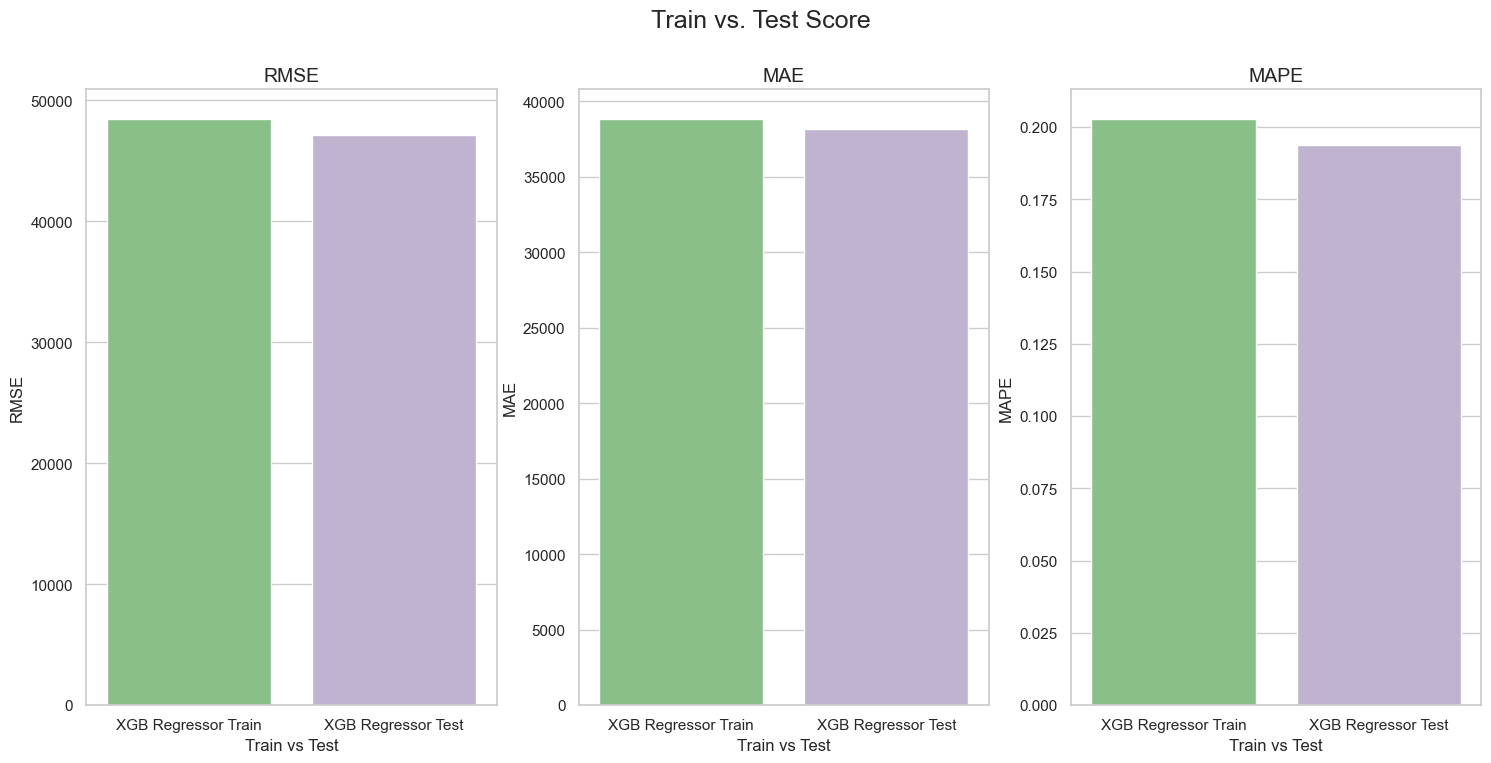

In [67]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
sns.barplot(data=test_final_score.reset_index(), x='index', y='RMSE', estimator=sum, palette=palette)
plt.title('RMSE', size=14)
plt.xlabel('Train vs Test')

plt.subplot(1,3,2)
sns.barplot(data=test_final_score.reset_index(), x='index', y='MAE', estimator=sum, palette=palette)
plt.title('MAE', size = 14)
plt.xlabel('Train vs Test')

plt.subplot(1,3,3)
sns.barplot(data=test_final_score.reset_index(), x='index', y='MAPE', estimator=sum, palette=palette)
plt.title('MAPE', size = 14)
plt.xlabel('Train vs Test')

plt.suptitle('Train vs. Test Score', size=18)
plt.show()

Jika di lihat pada visualisasi di atas, kita dapat melihat bahwa nilai data train pada RMSE, MAE, dan MAPE lebih rendah (hasil prediksi lebih baik) dibandingkan data test. Namun, dapat terlihat juga bahwa tidak terdapat perbedaan signifikan antara hasil train dan test. Maka dapat kita simpulkan bahwa model ini tidak overfitting.

Selanjutnya kita akan coba melihat bagaimana visualisasi harga asli (Actual Price) dan harga prediksi (Prediction Price) pada data kita

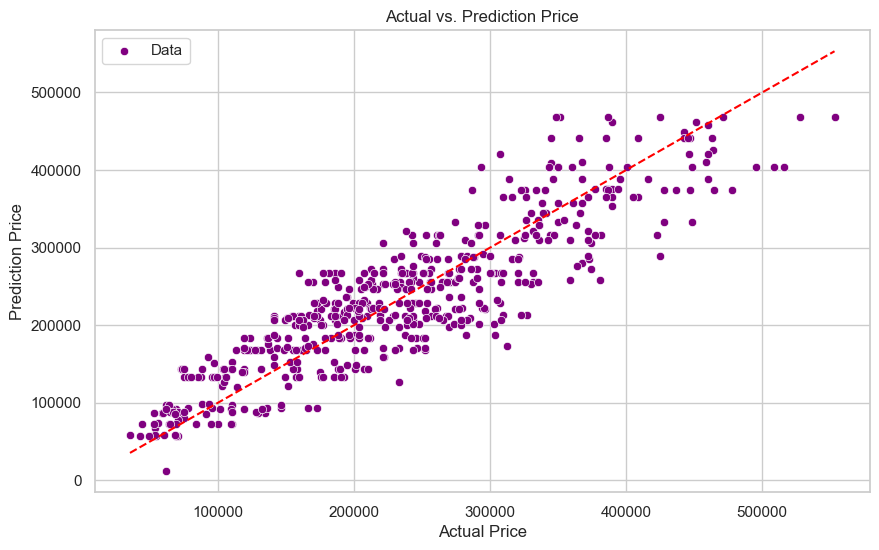

In [68]:
plt.figure(figsize=(10, 6)) 

sns.scatterplot(x=y_test, y=y_pred_xgb_tuning, label='Data', marker='o', color='purple')

plt.xlabel('Actual Price')  
plt.ylabel('Prediction Price')    
plt.title('Actual vs. Prediction Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.grid(True)

plt.show()  


Berdasarkan visualisasi di atas, kita dapat melihat bahwa masih terdapat perbedaan antara harga aktual dan prediksi, namun perbedaannya tidak terlalu signifikan. Masih terdapat data yang harga aktual dan prediksinya sama, hal tersebut dapat dilihat pada titik yang berada di garis merah. Namun, memang masih banyak data yang berbeda antara aktual dan prediksi. Hal tersebut dikarenakan masih terdapat error dari hasil MAPE adalah 19,36%.

**Feature Importance**

Selanjutnya kita akan coba melihat, fitur apa saja yang paling mempengaruhi target (harga apartemen).

In [69]:
imp = imp = pd.DataFrame({
    'feature': transformer.get_feature_names_out(),
    'importance': xgb_tuning['model'].feature_importances_
}).sort_values('importance', ascending=False)

imp

,feature,importance
11,scaler__YearBuilt,0.286660
12,scaler__N_FacilitiesInApt,0.159451
1,oneHot__HallwayType_terraced,0.104575
10,scaler__N_Parkinglot(Basement),0.093290
13,scaler__Size(sqf),0.092547
7,scaler__N_FacilitiesNearBy(ETC),0.059390
6,ordinal__TimeToSubway,0.055106
8,scaler__N_FacilitiesNearBy(PublicOffice),0.041156
9,scaler__N_SchoolNearBy(University),0.034000
3,binary__SubwayStation_1,0.024190


Text(0.5, 1.0, 'Feature Importances')

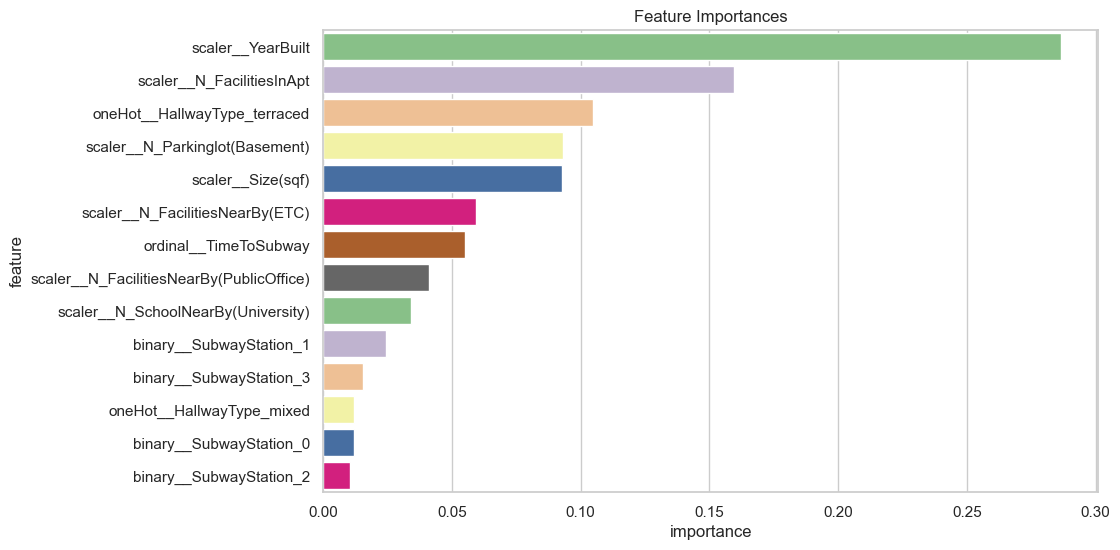

In [65]:
# Plot feature importances
plt.figure(figsize=(10, 6)) 
sns.barplot(data=imp, x='importance', y='feature', palette=palette)
plt.title('Feature Importances')

Dari hasil visualisasi diatas,Kita dapat mengehtahui bahwa YearBuilt merupakan fitur yang paling penting(berpengaruh) di data kita,lalu N_FacilitiesNearBy(ETC)(jumlah fasilitas terdekat),HallwayType(tipe/jenis) apartemen,dan seterusnya . Fitur yang paling tidak penting(kurang berpengaruh) di data kita adalah SubwayStation(stasiun bawah tanah).

Setelah kita mengetahui fitur-fitur yang importance, kita mungkin akan berfikir bahwa fitur-fitur yang memiliki nilai rendah tidak berpengaruh terhadap model dan dapat kita hapus. Namun, kita tidak menghapus fitur-fitur yang memiliki tingkat importance kecil dikarenakan :

Final model/ algortima yang kita gunakan adalah XGBoost. XGBoost memiliki kemampuan bawaan untuk mengatasi fitur yang tidak relevan atau noise dalam data. Jika fitur tersebut memiliki dampak yang sangat negatif pada prediksi, model ini mungkin akan mencoba mengabaikannya. Namun, jika dampaknya cukup kecil, fitur tersebut mungkin tetap digunakan. Model ini akan memilih fitur-fitur yang paling informatif. Sehingga dengan menghilangkan fitur dimungkinkan tidak membuat performa model menjadi meningkat. Seperti yang sudah dijelaskan terkait cara kerja XGBoost, hal ini berada pada membangun pohon yang sudah belajar dari kesalahan.
Dataset yang kita gunakan hanya memiliki 11 kolom (sudah terbatas). Kemudian jika kita lihat pada visualisasi korelasi di awal, kita melihat bahwa semua fitur memiliki hubungan dengan harga apartemen. Sehingga setiap fitur dalam dataset sudah memiliki potensi untuk mempengaruhi prediksi harga apartemen.

# *6. Conclusion and Recommendations**

## **Conclusion**

Setelah kita melakukan persiapan terhadap data (hapus data duplicate, ubah tipe data, dan feature engineering), kemudian kita lakukan CrossValidation untuk menentukan model terbaik dan Hyperparameter Tunning untuk menemukan parameter terbaik, kita menemukan algoritma model Machine Learning yang paling baik untuk digunakan pada dataset kita, yaitu **XGBoost Regresor**. 

Hasil prediksi ini dapat diukur pencapaiannya melalui metrik RMSE, MAE, dan MAPE yang telah dihitung:
- RMSE **47128**
- MAE **38200**
- MAPE **19.36%**


Kemudian kita juga dapat mengidentifikasi dan memahami 5 faktor yang paling berpengaruh terhadap harga jual apartemen di Daegu, yaitu :
1. **Tahun Pembangunan** (Year Built) menjadi faktor yang paling berpengaruh terhadap harga apartemen, dengan skor Feature Importance sekitar 0.20. Apartemen yang lebih baru biasanya memiliki fitur dan fasilitas yang lebih modern, sehingga harganya menjadi lebih tinggi.
2. **Jumlah Fasilitas di Sekitar Apartemen** (N_FacilitiesNearBy(ETC)) memiliki pengaruh yang signifikan dengan skor Feature Importance sekitar 0.10. Apartemen yang dekat dengan fasilitas yang lebih lengkap membuat harga apartemen menjadi lebih tinggi
3. **Tipe/Jenis Apartement**(HallwayType) juga memiliki pengaruh, dimana yang bertipe Terraced(berteras) lebih diminati sehingga
   membuat harga menjadi lebih tinggi
4. **Jumlah Tempat Parkir di Basement** (N_Parkinglot(Basement)) memiliki pengaruh, dengan skor Feature Importance sekitar 0.09. Apartemen yang memiliki jumlah tempat parkir kendaraan yang banyak membuat harganya tinggi.
5. **Ukuran Apartemen** (Size(sqf)) juga memiliki pengaruh yang lumayan besar terhadap harga, dengan skor Feature Importance sekitar 0.18. Apartemen yang lebih besar biasanya memiliki lebih banyak kamar dan ruang, sehingga harganya lebih tinggi.

Juga dapat dijadikan bahan pertimbangan bahwa **Subwaystation(stasiun bawah tanah)** adalah faktor yang tidak terlalu berpengaruh.

Dengan menggunakan pendekatan machine learning ini,maka ada beberapa hal yang dapat di peroleh yaitu :
1. **Ketepatan penentuan harga**: Model ini dapat membantu pemilik apartemen dalam menentukan harga jual yang lebih tepat.
2. **Efisiensi Waktu**: Model ini dapat mempersingkat waktu yang diperlukan dalam menentukan harga jual properti.
   Dengan pendekatan data ini,maka pemilik apartemen setidaknya bisa mempunyai panduan awal dalam menentukan harga.
3. **Faktor Lainnya** : demgan model ini pemilik apartemen bisa melihat faktor-faktor penting terkait properti
4. **Arah investasi**: dengan model ini pemilik apatement lebih yakin dalam menentukan arah investasinya

Model ini hanya alat bantu dalam proses penentuan harga selain faktor-faktor lain diluar ini.

## **Recommendations**

Berikut adalah beberapa rekomendasi berdasarkan hasil Machine Learning ini:

1. **Pembaharuan dan penyesuaian model**
   - Perbarui model secara terus-menerus dengan data transaksi terbaru untuk memastikan akurasi yang tinggi (per bulan atau setiap ada perubahan)
   - Secara berkala tetap dilakukan penyesuaian parameter model agar selaras dengan tren pasar terkini dan tingkat presisi prediksi

2. **Integrasi dan Otomatisasi :**
   - Integrasikan model prediktif ke dalam sistem real estate yang sudah ada/berjalan sehingga proses pemberian harga menjadi lebih tepat
   - Gunakan model dalam sistem rekomendasi harga otomatis untuk klien, dengan memanfaatkan data historis dan prakiraan tren masa depan.

3. **Validasi model dan mitigasi resiko :**
   - Terapkan cross-validation dengan berbagai dataset untuk mengonfirmasi keandalan model
   - Tetapkan strategi mitigasi risiko untuk mengatasi potensi masalah seperti overfitting atau ketidakakuratan dalam segmen harga tertentu.
     
4. **Pengembangan Strategi berbasis data**
   - Rumuskan strategi pemasaran yang menargetkan fitur properti yang secara signifikan memengaruhi harga jual.
   - Optimalkan alokasi sumber daya berdasarkan wawasan dari analisis fitur penting dan prediksi harga pasar.

Machine Learning ini memiliki beberapa batasan, termasuk keterbatasan data yang tersedia dan batasan waktu. 

Dengan menggabungkan kesimpulan dan rekomendasi ini, para pemangku kepentingan real estat di Daegu dapat memanfaatkan hasil analisis untuk menyempurnakan strategi penetapan harga dan penjualan, sehingga meningkatkan akurasi dan meminimalkan risiko yang terkait dengan kesalahan prediksi harga.

#### **Save Model**

In [72]:
# # # save model
# import pickle

# # # best model
# xgb_tuning = grid_xgb.best_estimator_

# # # fitting
# xgb_tuning.fit(X,y)

# # # save with pickle
# pickle.dump(xgb_tuning, open('model_xgboost_ChristianTjoputera.sav', 'wb'))

# ==== END === # 